#**Pipeline**
Pipelines are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.
Many data scientists hack together models without pipelines, but pipelines have some important benefits. 
Those include:
* Cleaner Code: Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.
* Fewer Bugs: There are fewer opportunities to misapply a step or forget a preprocessing step.
* Easier to Productionize: It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.
* More Options for Model Validation: You will see an example in the next tutorial, which covers cross-validation.

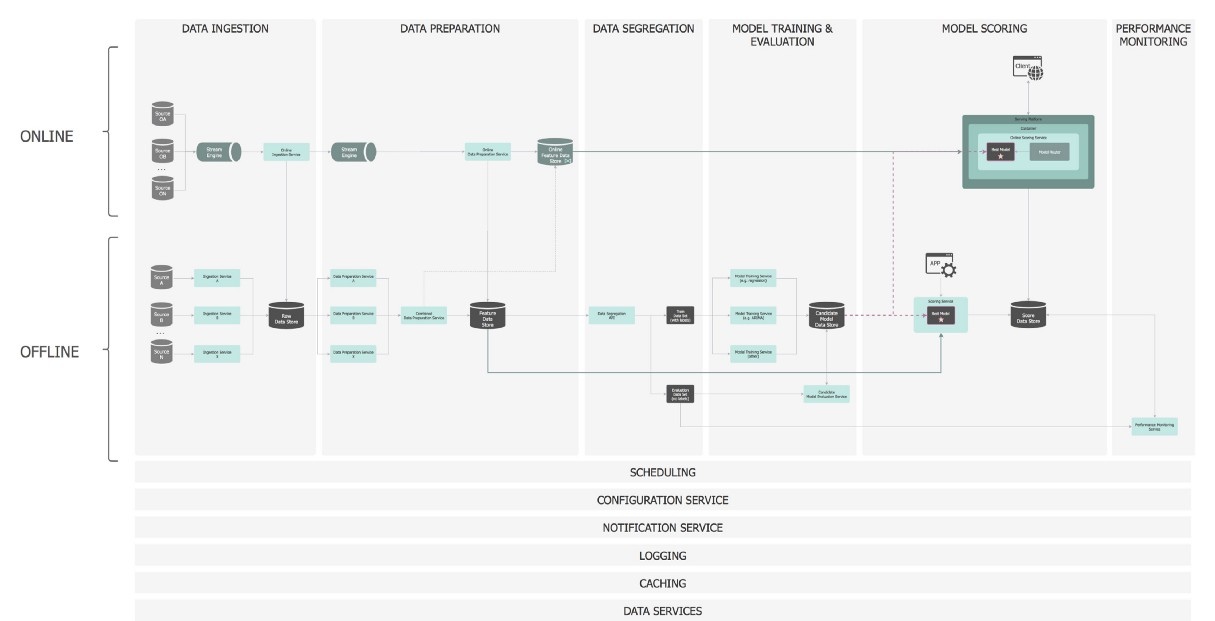

###***1-Data Ingestion***
Funnelling incoming data into a data store is the first step of any ML workflow. The key point is that data is persisted without undertaking any transformation at all, to allow us to have an immutable record of the original dataset. Data can be fed from various data sources; either obtained by request (pub/sub) or streamed from other services.
NoSQL document databases are ideal for storing large volumes of rapidly changing structured and/or unstructured data, since they are schema-less. They also offer a distributed, scalable, replicated data storage.

###***2-Data Preparation***
Data exploration, data transformation and feature engineering. As this is the most complex part of a ML project, introducing the right design patterns is crucial, so in terms of code organisation having a factory method to generate the features based on some common abstract feature behaviour as well as a strategy pattern to allow the selection of the right features at run time is a sensible approach. Both feature extractors and transformers should structured with composition and re-usability in mind.

###***3-Data Segregation***
Split subsets of data to train the model and further validate how it performs against new data. The fundamental goal of the ML system is to use an accurate model based on the quality of its pattern prediction for data that it has not been trained on. As such, existing labelled data is used as a proxy for future/unseen data, by splitting it into training and evaluation subsets.

###***4-Model Training***
Use the training subset of data to let the ML algorithm recognise the patterns in it. The model training pipeline is offline only and its schedule varies depending on the criticality of the application, from every couple of hours to once a day. Apart from schedulers, the service is also time and event triggered.

###***5-Candidate Model Evaluation***
Assess the performance of the model using the test subset of data to understand how accurate the prediction is. This pipeline is also offline. The predictive performance of a model is evaluated by comparing predictions on the evaluation dataset with true values using a variety of metrics. The “best” model on the evaluation subset is selected to make predictions on future/new instances. A library of several evaluators is designed to provide a model’s accuracy metrics (e.g. ROC curve, PR curve), which are also saved against the model in the data store. Again, same patterns are applicable here to allow flexibility on combining and switching between evaluators.

###***6-Model Deployment***
Once the chosen model is produced, it is typically deployed and embedded in decision-making frameworks. Model deployment is not the end; it is just the beginning!
The best model selected is deployed for offline (asynchronous) and online (synchronous) predictions. More than one models can be deployed at any time to enable safe transition between old and new models — i.e. when
deploying a new model, the services need to keep serving prediction requests.

###***7-Model Scoring***
Process of applying a ML model to a new dataset in order to uncover practical insights that will help solve a business problem. A.k.a. Model Serving. Model Scoring and Model Serving are two terms that are used interchangeably in the industry. What scoring really means, occurred to me after reading this resource, so before moving on, let’s quickly cover the basics, in case this is not clear to you either:
Model Scoring is the process of generating new values, given a model and some new input. 

###***8-Performance Monitoring***
The model is continuously monitored to observe how it behaved in the real world and calibrated accordingly.Any ML solution requires a well-defined performance monitoring solution.



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Defining the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

NameError: ignored